In [1]:
# Import required packages
import sys
# !{sys.executable} -m pip install seaborn
from glob import glob
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from shutil import copy,move
from distutils.dir_util import copy_tree


In [2]:
len(glob("*/*results.json"))

100

In [6]:
stackeddf=[]
for i in glob("*/*results.json"):
    name = os.path.dirname(i)
    with open(i) as f:
        data = json.load(f)
    data['encoder']=name.split('_')[0]
    data['ansatz']=name.split('_')[1]
    stackeddf.append(pd.DataFrame.from_dict(data).rename(index={0:name}))
print(len(stackeddf))
stackeddf = pd.concat(stackeddf).melt(id_vars=['encoder','ansatz'], value_vars=['MAE_train','MAE_test']).sort_values(by=['encoder','ansatz'])

100


In [4]:
stackeddf

,encoder,ansatz,variable,value
83,A1,Full-Pauli-CRX,MAE_train,19.965461
183,A1,Full-Pauli-CRX,MAE_test,20.565699
1,A1,Full-Pauli-CRZ,MAE_train,19.972949
101,A1,Full-Pauli-CRZ,MAE_test,20.631999
17,A1,HWE-CNOT,MAE_train,19.394438
...,...,...,...,...
175,M-M-CZ,Hadamard,MAE_test,22.655238
59,M-M-CZ,Modified-Pauli-CRX,MAE_train,21.625273
159,M-M-CZ,Modified-Pauli-CRX,MAE_test,21.784129
58,M-M-CZ,Modified-Pauli-CRZ,MAE_train,34.809756


/tmp/ipykernel_66829/3297483802.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g = sns.catplot(


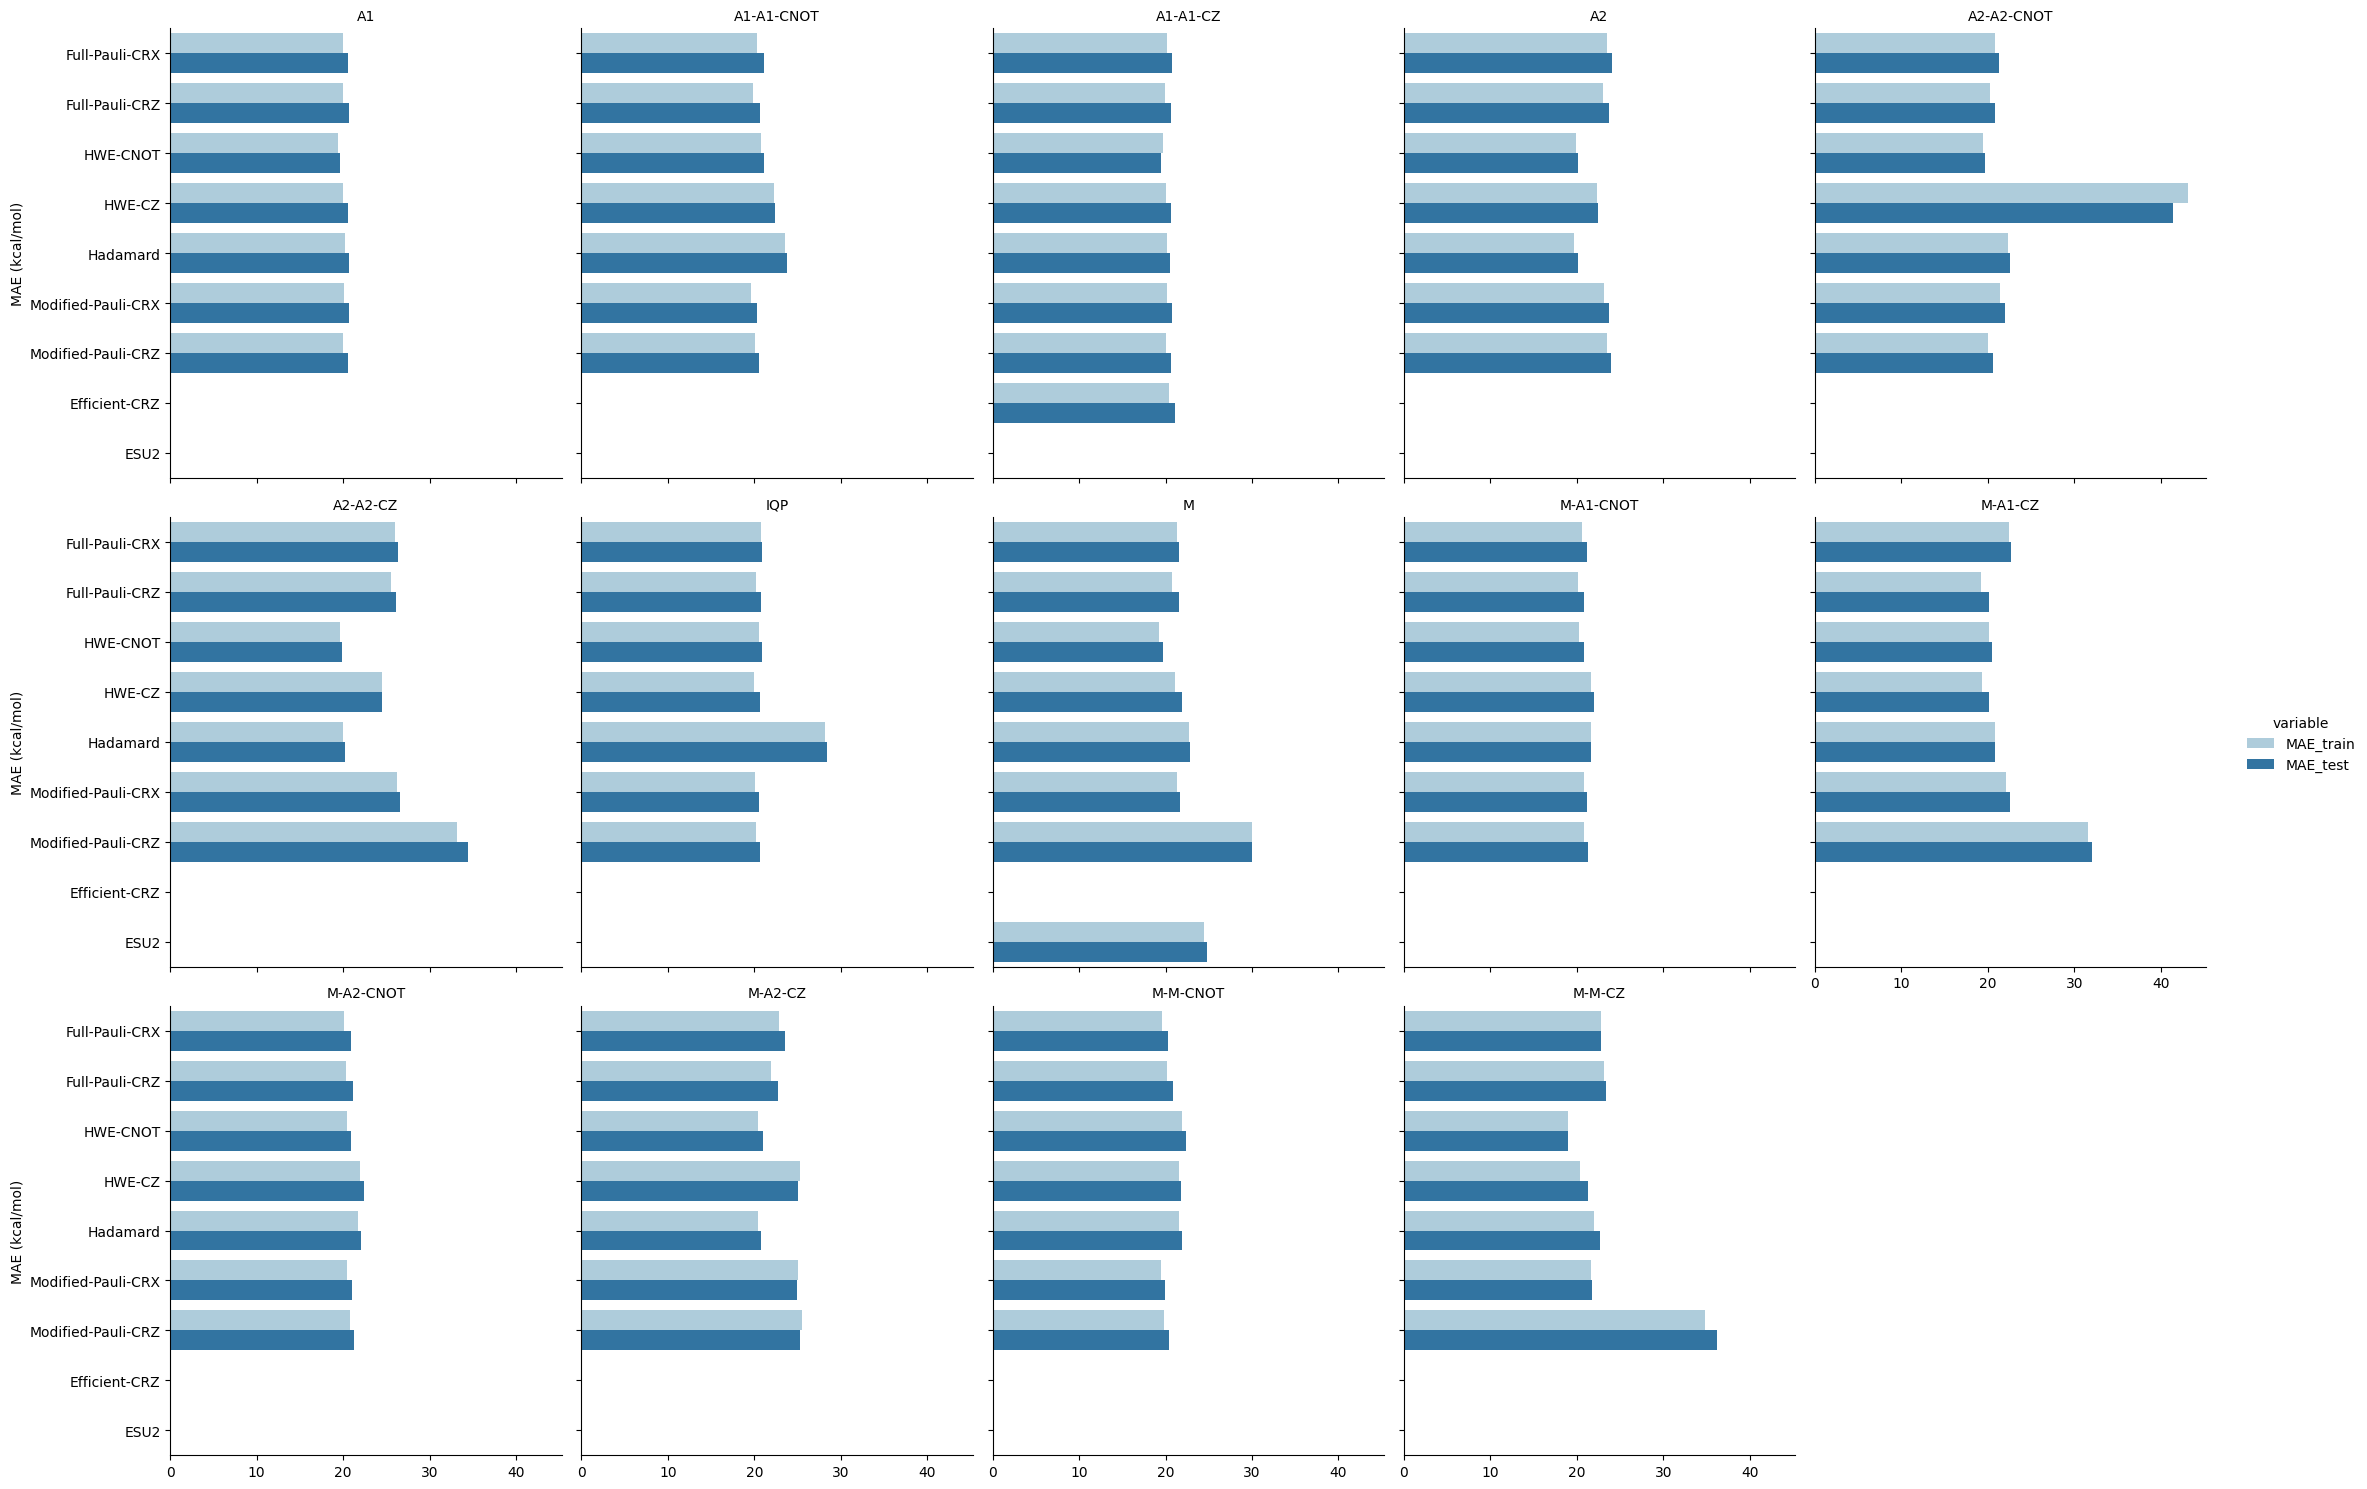

In [5]:
g = sns.catplot(
    data=stackeddf, y="ansatz", x="value", col="encoder",hue="variable",
    kind="bar", height=5, aspect=.9,palette=sns.color_palette('Paired',5),col_wrap=5,legend_out=True)

g.set_titles("{col_name}")
# g.set_axis_labels("", "R$^{2}$")
g.set_axis_labels("", "MAE (kcal/mol)")
# g.set(ylim=(-1.1, 1.1))
# g.fig.suptitle(f"16 Qubit BSE Re-upload Depth (RUD) and Ansatz Layer (AL)")
g.tight_layout()